In [1]:
from math import factorial

# Ejercicio 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from math import factorial

plt.rcParams["figure.figsize"] = (10,10)

In [3]:
N = 50
P = 0.7

In [4]:
def nCr(n, x):
    return factorial(n) / factorial(x) / factorial(n - x)

def p(i, j):
    if j >= i:
        # El enunciado tiene un error. Si x = j - i entonces el exponente que tiene
        # la forma n-x deberia ser n-j+i y no n-j-i.
        return nCr(N, j - i) * (P ** (j - i)) * ((1 - P) ** (N - j + i))
    else:
        # Si se toma i - 1 la funcion dividiria por 0 lo cual genera errores.
        # Se decide reemplazar por i.
        return (1 - sum([p(i, x) for x in range(i, N + 1)])) / i

def state_matrix():
    rows = []
    
    for i in range(N + 1):
        row = []
        for j in range(N + 1):
            row.append(p(i, j))
        
        rows.append(row)
    
    return np.array(rows)

def simulate(cycles, state):
    steps = [np.random.choice(N)]
    frequencies = [0 for x in range(N + 1)]
    
    for _i in range(cycles):
        probabilities = state[steps[-1]]
        steps.append(np.random.choice(range(N + 1), p=probabilities))
        frequencies[steps[-1]] += 1
        
    return steps, frequencies

## a)

In [5]:
STATE_MATRIX = state_matrix()

print(STATE_MATRIX)
print([sum(x) for x in STATE_MATRIX])

[[7.17897988e-27 8.37547652e-25 4.78798075e-23 ... 4.04654635e-06
  3.85385366e-07 1.79846504e-08]
 [1.79846504e-08 7.17897988e-27 8.37547652e-25 ... 2.77477464e-05
  4.04654635e-06 3.85385366e-07]
 [2.01685008e-07 2.01685008e-07 7.17897988e-27 ... 1.39729723e-04
  2.77477464e-05 4.04654635e-06]
 ...
 [2.08333333e-02 2.08333333e-02 2.08333333e-02 ... 7.17897988e-27
  8.37547652e-25 4.78798075e-23]
 [2.04081633e-02 2.04081633e-02 2.04081633e-02 ... 2.04081633e-02
  7.17897988e-27 8.37547652e-25]
 [2.00000000e-02 2.00000000e-02 2.00000000e-02 ... 2.00000000e-02
  2.00000000e-02 7.17897988e-27]]
[1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 0.9999999999999997, 1.0000000000000002, 0.9999999999999997, 0.9999999999999997, 1.0000000000000007, 1.0000000000000007, 1.0000000000000004, 0.9999999999999998, 0.9999999999999996, 1.0000000000000004, 1.000000000000

## b)

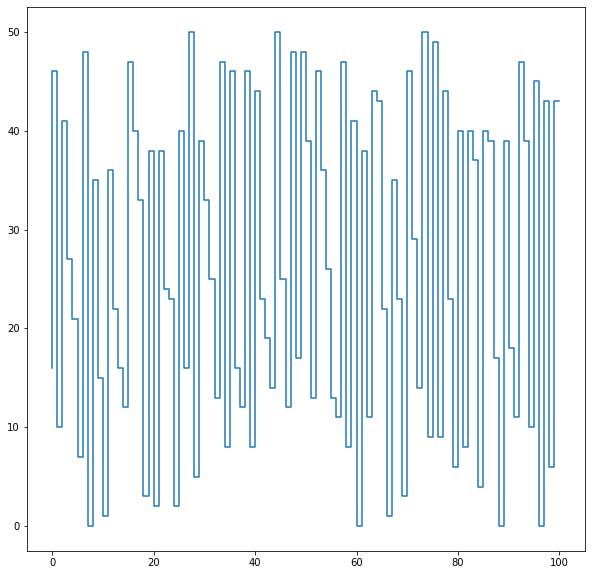

In [6]:
simulation_1 = simulate(100, STATE_MATRIX)[0]

plt.step(range(len(simulation_1)), simulation_1)
plt.show()

## c)

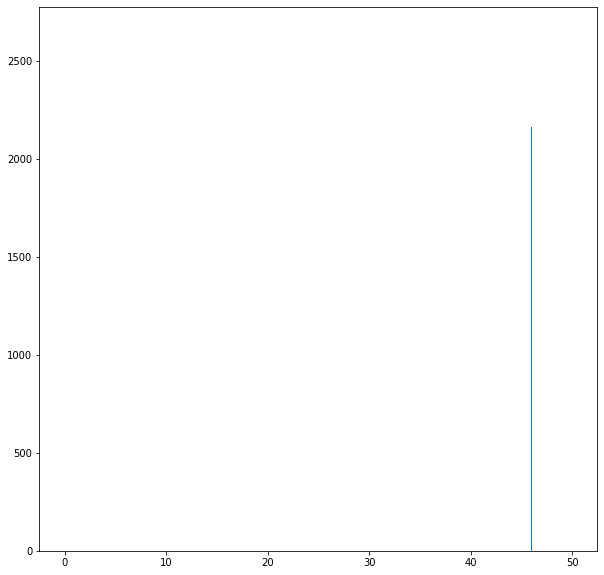

In [7]:
simulation_2, frequencies_2 = simulate(100000, STATE_MATRIX)

plt.hist(simulation_2, bins=len(simulation_2))
plt.show()

## d)

In [8]:
print("{:.2f}%".format(frequencies_2[0] / len(simulation_2) * 100))

2.15%


## e)

In [9]:
more_than_40 = sum(frequencies_2[41:]) / len(simulation_2) * 100

print("{:.2f}%".format(more_than_40))
print("El cambio {}es recomendado".format("no " if more_than_40 >= 10 else ""))

22.92%
El cambio no es recomendado
